# Example: KPM A_step fit

In this example we will load in KPM processes vectors that were fit to a sample of APOGEE disk stars and fit only the A step to predict the abundances for a subset of stars. 

In [1]:
import numpy as np
import kpm
from matplotlib import pyplot as plt
from astropy.io import fits
import pickle

The APOGEE data needed for this example is in the ```input``` folder. ```alldata``` and ```allivars``` are numpy arrays of shape (number of stars, number of elements). The element order must be the same as ```elements``` variable.

In [2]:
elements  = np.array(['Mg','O','Si','S','Ca','CN','Na','Al','K','Cr','Fe','Ni','Mn','Co','Ce'])
alldata = np.load('input/alldata_test.npy')
allivars = np.load('input/allivars_test.npy')

Create the kpm ```abund_data``` object

In [3]:
data = kpm.abund_data(elements, alldata, allivars)

In [4]:
data

kpm.abund_data{
    Elements ------------ > ['Mg' 'O' 'Si' 'S' 'Ca' 'CN' 'Na' 'Al' 'K' 'Cr' 'Fe' 'Ni' 'Mn' 'Co' 'Ce']
    Number of elements -- > 15
    Number of stars ----- > 227603
}

Instead of fully fitting this sample with KPM, we will load in the fit and fixed objects from a previous fit (see NB_Example_KPM.ipynb).

Note that the ```fit_old``` object is fit to a different sample of stars that the ``data`` object here.

In [5]:
pik_name = 'output/MW_disk_example_K2_qccFe0.4_J11_2.out'
with open(pik_name, "rb") as pik1:
    fit_old, fixed_old = pickle.load(pik1)

In [6]:
fixed_old

kpm.fixed_params{
    K ------------------- > 2
    A list -------------- > ['Mg' 'O' 'Si' 'S' 'Ca' 'CN' 'Na' 'Al' 'K' 'Cr' 'Fe' 'Ni' 'Mn' 'Co' 'Ce']
    Proc elements ------- > ['Mg' 'Fe']
    fixed qs ------------ > [[1.  0. ]
 [0.4 0.6]]
    J ------------------- > 11
    Lambda As ----------- > [0. 0.]
    Lambda qs ----------- > [1000000.    1000.]
    xlim ---------------- > [-0.5818765   0.36397953]
    Delta --------------- > 0.0
}

We'll create a new ```fixed``` object with the same parameters as ```fixed_old```, but specific to our new dataset.

In [10]:
fixed = kpm.fixed_params(data, K=fixed_old.K, J=fixed_old.J, A_list=fixed_old.elements, 
                         Lambda_As=fixed_old.Lambda_As)
# We must set the xlims the same as the old fit
fixed.xlim =fixed_old.xlim

In [11]:
fixed

kpm.fixed_params{
    K ------------------- > 2
    A list -------------- > ['Mg' 'O' 'Si' 'S' 'Ca' 'CN' 'Na' 'Al' 'K' 'Cr' 'Fe' 'Ni' 'Mn' 'Co' 'Ce']
    Proc elements ------- > ['Mg' 'Fe']
    fixed qs ------------ > [[1.  0. ]
 [0.4 0.6]]
    J ------------------- > 11
    Lambda As ----------- > [0. 0.]
    Lambda qs ----------- > [1000000.    1000.]
    xlim ---------------- > [-0.5818765   0.36397953]
    Delta --------------- > 0.0
}

Lets find the best fit As for the new data set using the q vectors from the old fits

In [12]:
fit = kpm.find_As(data, fixed, fit_old.lnq_pars, verbose=False)

/Users/emilygriffith/KProcessModel/API/kpm/initialize.py:129: UserWarning: WARNING: `xlims` in input `fixed` must be the same as the `xlims` used to find 		the input `lnq_pars`.
  warnings.warn("WARNING: `xlims` in input `fixed` must be the same as the `xlims` used to find \


Lets look at some plots of the results

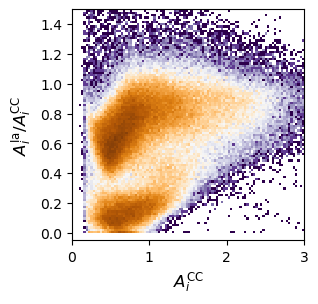

In [13]:
kpm.plot_As(fit)

/Users/emilygriffith/KProcessModel/API/kpm/visualize.py:89: RuntimeWarning: divide by zero encountered in divide
  synthnoise = _RNG2.normal(size=synthdata.shape) / data.sqrt_allivars


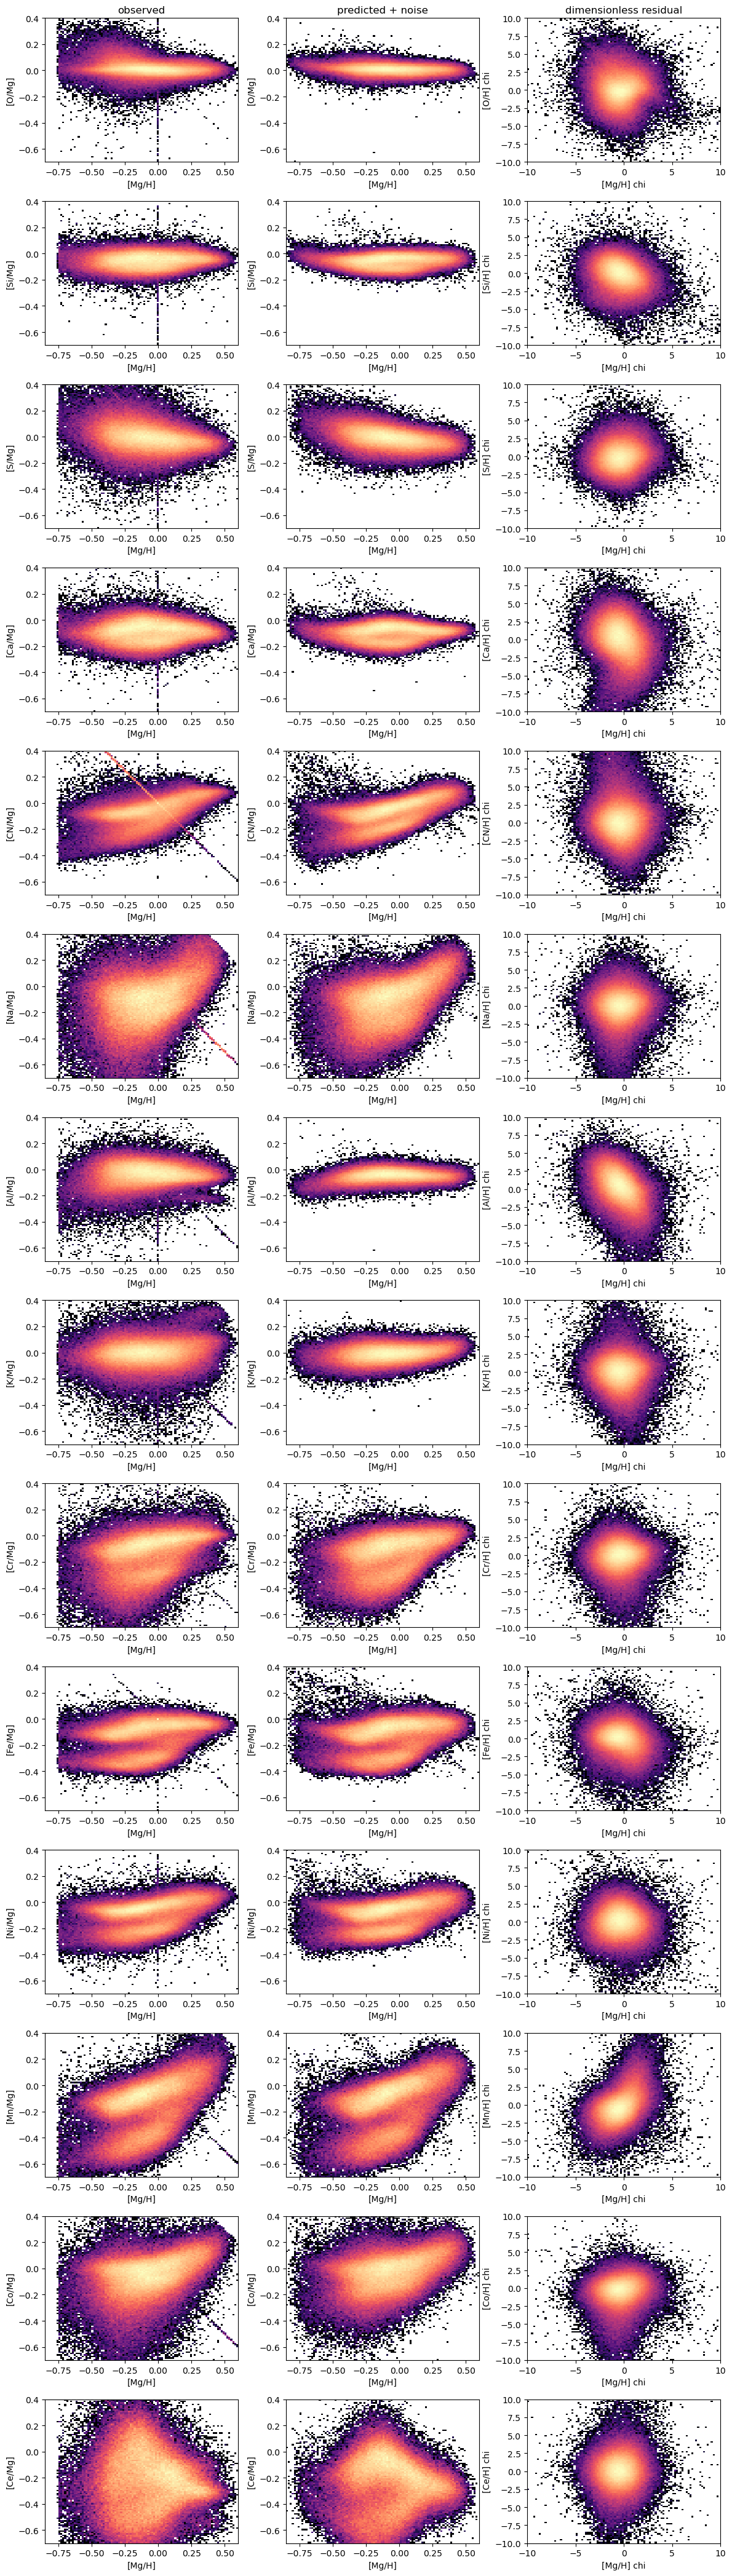

In [14]:
kpm.plot_model_abundances(data, fixed, fit, noise=True)

Save the output from this A_step

In [15]:
pik_name = 'output/MW_disk_A_step_K2_J11.out'
save = [fit, fixed]
with open(pik_name, "wb") as f:
    pickle.dump(save, f)

If you want to directly calculate the predicted abundances, you can use this code. ```pred_abund``` will be the same shape as ```alldata```.

In [16]:
pred_abund = kpm.all_stars_KPM(fixed, fit)

In [17]:
np.shape(pred_abund)

(227603, 15)